<a href="https://colab.research.google.com/github/qyoshii/3AP_DSC/blob/main/3AP_06_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# まず，自分のgoogle driveをマウント（データ読み込めるようにする）



In [63]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import:pythonの使う機能を読み込む

In [64]:
import numpy as np
import pandas as pd

from google.colab import files

# 使用するexcelファイルを読み込む（これは個人のファイル名に応じて変える，また今はgoogle driveの直下に"3AP_06"というディレクトリを作ってその中にExcelのファイルを入れている）

In [65]:
df_in = pd.read_excel("/content/drive/MyDrive/3AP_06/excel_In_5Kpm_1.0mg_20250530.xlsx", skiprows=21, usecols="A:D")

# データフレームを確認

In [66]:
df_in

,min,Cel,uW,uW/min
0,0.000000,146.280426,16.277863,-122.978760
1,0.003333,146.280396,16.683167,-121.214355
2,0.006667,146.280334,17.094360,-119.606323
3,0.010000,146.280212,17.503235,-118.037842
4,0.013333,146.280060,18.001099,-116.563110
...,...,...,...,...
3896,12.986667,144.132370,83.887787,-3.225403
3897,12.990000,144.132584,83.899567,-3.184937
3898,12.993333,144.132767,83.912445,-3.147766
3899,12.996667,144.132950,83.925522,-3.136230


In [67]:
df_in_edit  = df_in

In [68]:
df_in_edit

,min,Cel,uW,uW/min
0,0.000000,146.280426,16.277863,-122.978760
1,0.003333,146.280396,16.683167,-121.214355
2,0.006667,146.280334,17.094360,-119.606323
3,0.010000,146.280212,17.503235,-118.037842
4,0.013333,146.280060,18.001099,-116.563110
...,...,...,...,...
3896,12.986667,144.132370,83.887787,-3.225403
3897,12.990000,144.132584,83.899567,-3.184937
3898,12.993333,144.132767,83.912445,-3.147766
3899,12.996667,144.132950,83.925522,-3.136230


# "df_in_edit"というデータフレームをテキストのエクセルのように編集する

In [71]:
# "#"はコメントアウトを意味する
###  質量とmolを計算
mass = 0.0011 #1.1 mg
g_mol = 114.818 #
mol = mass/g_mol

###  時間を温度を秒とKに変換
df_in_edit ["time(s)"] = df_in_edit.iloc[:, 0] * 60
df_in_edit ["temp(K)"] = df_in_edit.iloc[:, 1] + 273.15

df_in_edit["dT/dt"] = (df_in_edit["temp(K)"].shift(1) - df_in_edit["temp(K)"])/(df_in_edit["time(s)"].shift(-1) - df_in_edit["time(s)"])
#df_in_edit["dT/dt"].fillna(0, inplace=True)

# C列*1.0*10^-6/G/(mass)
df_in_edit["c"] = df_in_edit.iloc[:, 2]*0.000001/df_in_edit.iloc[:, 6]/mass

#
df_in_edit["dH/dt"] =df_in_edit.iloc[:, 2]*0.000001/mol

#
df_in_edit["dS/dt"] =df_in_edit.iloc[:, 2]*0.000001/mol/df_in_edit.iloc[:, 5]


df_in_edit.head(100)

,min,Cel,uW,uW/min,time(s),temp(K),dT/dt,c,dH/dt,dS/dt
0,0.000000,146.280426,16.277863,-122.978760,0.0,419.430426,NaN,NaN,1.699083,0.004051
1,0.003333,146.280396,16.683167,-121.214355,0.2,419.430396,0.000153,99.395273,1.741389,0.004152
2,0.006667,146.280334,17.094360,-119.606323,0.4,419.430334,0.000305,50.922545,1.784309,0.004254
3,0.010000,146.280212,17.503235,-118.037842,0.6,419.430212,0.000610,26.070273,1.826988,0.004356
4,0.013333,146.280060,18.001099,-116.563110,0.8,419.430060,0.000763,21.449454,1.878955,0.004480
...,...,...,...,...,...,...,...,...,...,...
95,0.316667,146.779785,-72.209381,554.154785,19.0,419.929785,-0.072021,0.911463,-7.537215,-0.017949
96,0.320000,146.794296,-74.025299,548.905518,19.2,419.944296,-0.072556,0.927506,-7.726761,-0.018399
97,0.323333,146.808990,-75.845734,542.815430,19.4,419.958990,-0.073471,0.938474,-7.916778,-0.018851
98,0.326667,146.823792,-77.657227,535.708374,19.6,419.973792,-0.074005,0.953954,-8.105861,-0.019301


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

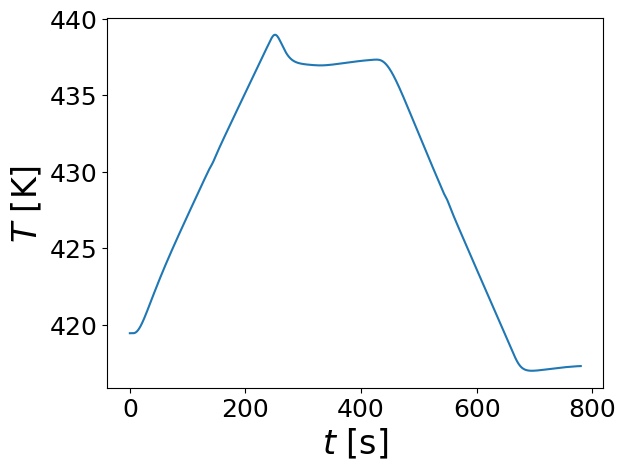

In [76]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_in_edit["time(s)"], df_in_edit["temp(K)"], linestyle='-')#, marker='o'

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$T$ [K]", fontsize=24)

plt.tick_params(labelsize=18)

plt.savefig('/content/drive/MyDrive/3AP_06/t_T.png', bbox_inches='tight',transparent=True)
files.download("/content/drive/MyDrive/3AP_06/t_T.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

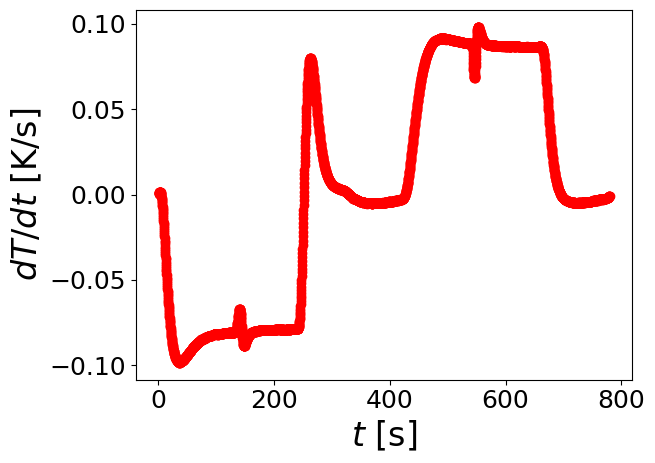

In [79]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_in_edit["time(s)"], df_in_edit["dT/dt"], marker='o', linestyle='-', color='red')

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dT/dt$ [K/s]", fontsize=24)

plt.tick_params(labelsize=18)

plt.savefig('/content/drive/MyDrive/3AP_06/t_dT_dt.png', bbox_inches='tight',transparent=True)
files.download("/content/drive/MyDrive/3AP_06/t_dT_dt.png")


# 次は確認用

Text(0, 0.5, 'C')

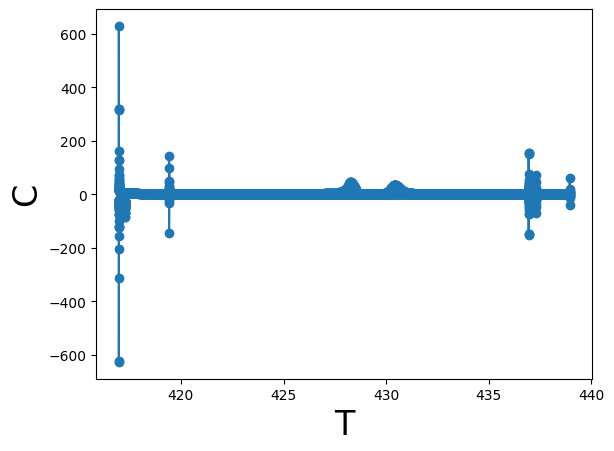

In [80]:
import matplotlib.pyplot as plt

plt.plot(df_in_edit["temp(K)"], df_in_edit["c"], marker='o', linestyle='-')

# ラベル・タイトル
plt.xlabel("T", fontsize=24)
plt.ylabel("C", fontsize=24)

# 着目すべきは，転移点近傍なので，その温度付近をみよう！

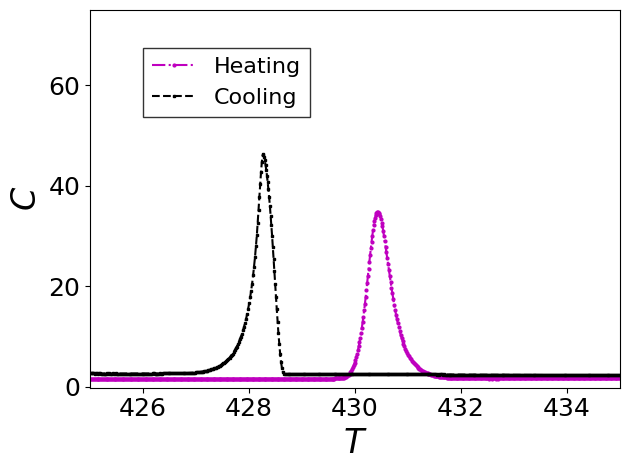

In [84]:
import matplotlib.pyplot as plt

from google.colab import files

# データの長さを取得して半分に分割
mid_index = len(df_in_edit) // 2
df_first = df_in_edit.iloc[:mid_index]
df_second = df_in_edit.iloc[mid_index:]

# プロット
plt.plot(df_first["temp(K)"], df_first["c"], marker='o', ms=2, linestyle='-.', label='Heating', color='m')
plt.plot(df_second["temp(K)"], df_second["c"], marker='s', ms=2, linestyle='--', label='Cooling', color='black')

# ラベル・軸範囲など
plt.xlabel("$T$", fontsize=24)
plt.ylabel("$C$", fontsize=24)
plt.xlim([425, 435])
plt.ylim([-0.2, 75])
plt.legend()
plt.legend(bbox_to_anchor=(0.1, 0.9), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)
plt.tick_params(labelsize=18)

# レイアウト調整
plt.tight_layout()


plt.show()

In [83]:
df_first

df_second

,min,Cel,uW,uW/min,time(s),temp(K),dT/dt,c,dH/dt,dS/dt
1950,6.500000,164.039719,17.042145,-7.847534,390.0,437.189719,-0.004807,-3.223302,1.778859,0.004069
1951,6.503333,164.040680,17.070129,-7.824829,390.2,437.190680,-0.004807,-3.228595,1.781780,0.004076
1952,6.506667,164.041641,17.094299,-8.027710,390.4,437.191641,-0.004807,-3.233166,1.784303,0.004081
1953,6.510000,164.042587,17.122162,-8.370483,390.6,437.192587,-0.004730,-3.290669,1.787211,0.004088
1954,6.513333,164.043579,17.151733,-8.591309,390.8,437.193579,-0.004959,-3.144213,1.790298,0.004095
...,...,...,...,...,...,...,...,...,...,...
3896,12.986667,144.132370,83.887787,-3.225403,779.2,417.282370,-0.001068,-71.398312,8.756207,0.020984
3897,12.990000,144.132584,83.899567,-3.184937,779.4,417.282584,-0.001068,-71.408338,8.757437,0.020987
3898,12.993333,144.132767,83.912445,-3.147766,779.6,417.282767,-0.000916,-83.322515,8.758781,0.020990
3899,12.996667,144.132950,83.925522,-3.136230,779.8,417.282950,-0.000916,-83.335500,8.760146,0.020993


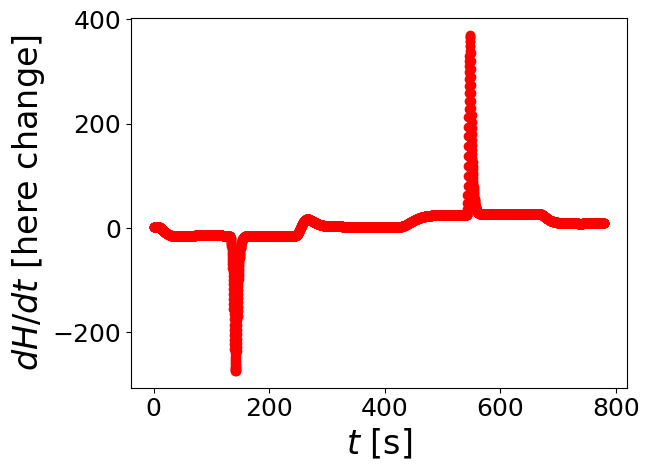

In [ ]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_in_edit["time(s)"], df_in_edit["dH/dt"], marker='o', linestyle='-', color='red')

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dH/dt$ [here change]", fontsize=24)

plt.tick_params(labelsize=18)


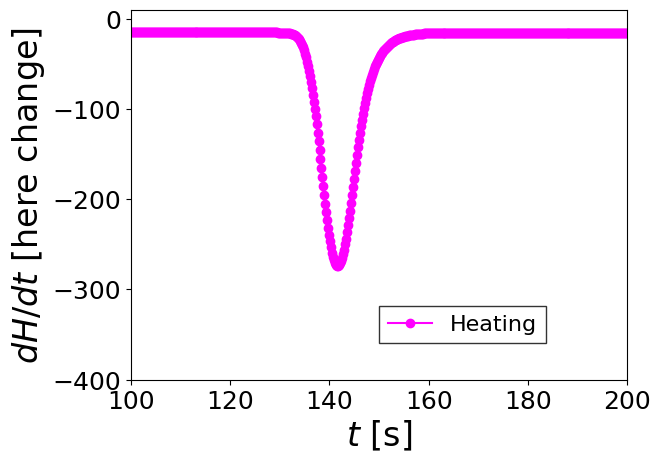

In [ ]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_in_edit["time(s)"], df_in_edit["dH/dt"], marker='o', linestyle='-', color='magenta', label="Heating")

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dH/dt$ [here change]", fontsize=24)

plt.xlim([100, 200])
plt.ylim([-400, 10])

#bbox_to_anchor = () ここで，x,yの場所を指定
plt.legend(bbox_to_anchor=(0.5, 0.2), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)

plt.tick_params(labelsize=18)

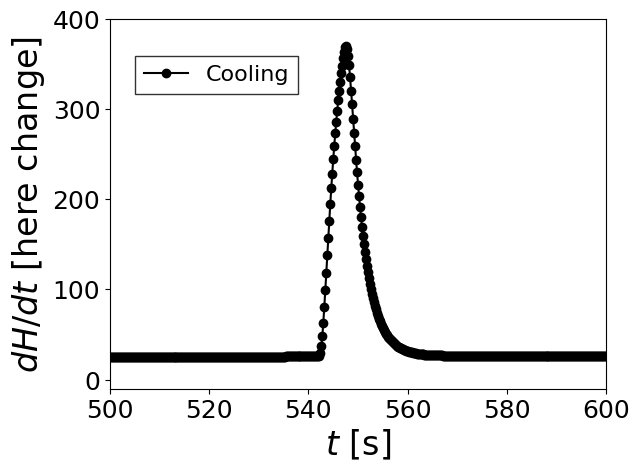

In [ ]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_in_edit["time(s)"], df_in_edit["dH/dt"], marker='o', linestyle='-', color='black', label="Cooling")

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dH/dt$ [here change]", fontsize=24)

plt.xlim([500, 600])
plt.ylim([-10, 400])

plt.legend(bbox_to_anchor=(0.05, 0.9), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)

plt.tick_params(labelsize=18)

# ベースラインの引き方の例

# まず，両端を拡大してみる

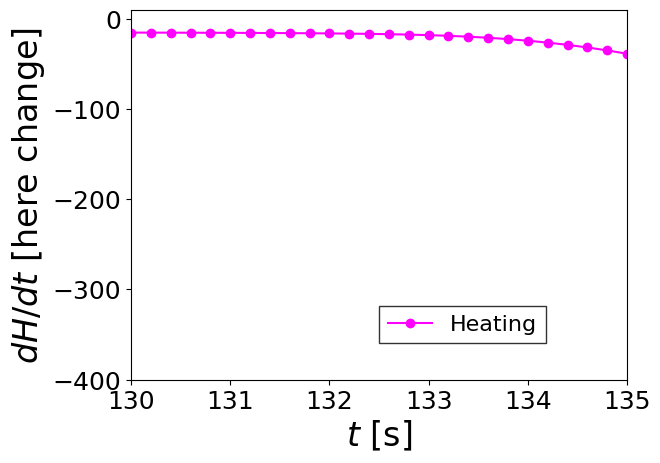

In [ ]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_in_edit["time(s)"], df_in_edit["dH/dt"], marker='o', linestyle='-', color='magenta', label="Heating")

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dH/dt$ [here change]", fontsize=24)

plt.xlim([130, 135])
plt.ylim([-400, 10])

#bbox_to_anchor = () ここで，x,yの場所を指定
plt.legend(bbox_to_anchor=(0.5, 0.2), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)

plt.tick_params(labelsize=18)

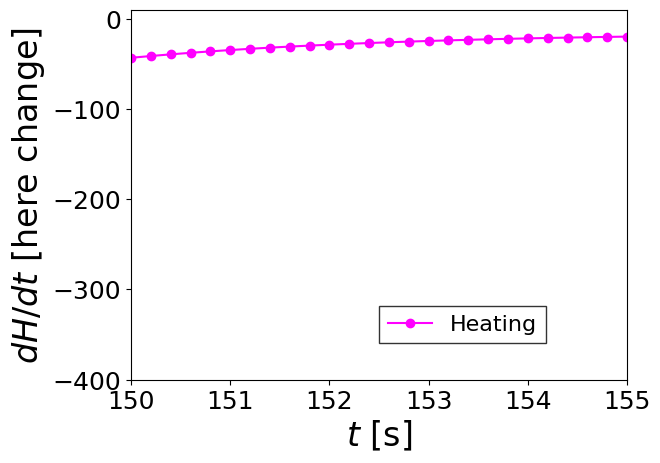

In [ ]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_in_edit["time(s)"], df_in_edit["dH/dt"], marker='o', linestyle='-', color='magenta', label="Heating")

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dH/dt$ [here change]", fontsize=24)

plt.xlim([150, 155])
plt.ylim([-400, 10])

#bbox_to_anchor = () ここで，x,yの場所を指定
plt.legend(bbox_to_anchor=(0.5, 0.2), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)

plt.tick_params(labelsize=18)

# 本当は真面目に交点を決めた方がいいけど，ここはpythonの操作の例を示している
# 仮にt= 133, 154を繋いだ直線をベースラインだとすると

In [ ]:
df_in_subset = df_in_edit[(df_in_edit["time(s)"] >= 133) & (df_in_edit["time(s)"] <= 154)]

In [ ]:
df_in_subset

,min,Cel,uW,uW/min,time(s),temp(K),dT/dt,c,dH/dt,dS/dt
665,2.216667,156.666275,-171.666809,3958.428223,133.0,429.816275,-0.080566,1.937045,-17.918582,-0.041689
666,2.220000,156.682343,-178.924622,4551.818359,133.2,429.832343,-0.080338,2.024692,-18.676152,-0.043450
667,2.223333,156.698425,-188.132111,5195.608398,133.4,429.848425,-0.080414,2.126863,-19.637230,-0.045684
668,2.226667,156.714447,-199.656464,5889.577637,133.6,429.864447,-0.080109,2.265746,-20.840142,-0.048481
669,2.230000,156.730438,-213.813354,6633.470215,133.8,429.880438,-0.079956,2.431033,-22.317838,-0.051916
...,...,...,...,...,...,...,...,...,...,...
766,2.553333,158.268661,-227.355530,-2090.264648,153.2,431.418661,-0.084457,2.447232,-23.731370,-0.055008
767,2.556667,158.285522,-221.470825,-1941.815552,153.4,431.435522,-0.084305,2.388204,-23.117125,-0.053582
768,2.560000,158.302383,-215.989624,-1804.027222,153.6,431.452383,-0.084305,2.329098,-22.544997,-0.052254
769,2.563333,158.319199,-210.915161,-1676.465698,153.8,431.469199,-0.084076,2.280570,-22.015325,-0.051024


# dH/dtの両端を一次関数で繋いだデータ点(dH/dt_linfit)の列を作成：これがベースラインとする

In [ ]:
import numpy as np

# 必要な情報を取得
y_start = df_in_subset["dH/dt"].iloc[0]      # 始点のdH/dt
y_end   = df_in_subset["dH/dt"].iloc[-1]     # 終点のdH/dt
n       = len(df_in_subset)                 # データ点の数

# 一次関数で補間（線形補間）　ここを変えれば補完の関数変えれる
line_values = np.linspace(y_start, y_end, n)

# 新しい列として追加
df_in_subset["dH/dt_linfit"] = line_values

df_in_subset

/tmp/ipython-input-59-2739255955.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in_subset["dH/dt_linfit"] = line_values


,min,Cel,uW,uW/min,time(s),temp(K),dT/dt,c,dH/dt,dS/dt,dH/dt_linfit
665,2.216667,156.666275,-171.666809,3958.428223,133.0,429.816275,-0.080566,1.937045,-17.918582,-0.041689,-17.918582
666,2.220000,156.682343,-178.924622,4551.818359,133.2,429.832343,-0.080338,2.024692,-18.676152,-0.043450,-17.952925
667,2.223333,156.698425,-188.132111,5195.608398,133.4,429.848425,-0.080414,2.126863,-19.637230,-0.045684,-17.987268
668,2.226667,156.714447,-199.656464,5889.577637,133.6,429.864447,-0.080109,2.265746,-20.840142,-0.048481,-18.021611
669,2.230000,156.730438,-213.813354,6633.470215,133.8,429.880438,-0.079956,2.431033,-22.317838,-0.051916,-18.055954
...,...,...,...,...,...,...,...,...,...,...,...
766,2.553333,158.268661,-227.355530,-2090.264648,153.2,431.418661,-0.084457,2.447232,-23.731370,-0.055008,-21.387225
767,2.556667,158.285522,-221.470825,-1941.815552,153.4,431.435522,-0.084305,2.388204,-23.117125,-0.053582,-21.421568
768,2.560000,158.302383,-215.989624,-1804.027222,153.6,431.452383,-0.084305,2.329098,-22.544997,-0.052254,-21.455911
769,2.563333,158.319199,-210.915161,-1676.465698,153.8,431.469199,-0.084076,2.280570,-22.015325,-0.051024,-21.490254


以下，点の値を確認するおまけ

In [ ]:
target = 133
# 絶対値の差をとって最小のインデックスを取得
nearest_idx = (df_in_edit["time(s)"] - target).abs().idxmin()
# その行のデータを取得
nearest_row = df_in_edit.loc[nearest_idx]
print(nearest_row)

min           2.216667
Cel         156.666275
uW         -171.666809
uW/min     3958.428223
time(s)     133.000000
temp(K)     429.816275
dT/dt        -0.080566
c             1.937045
dH/dt       -17.918582
dS/dt        -0.041689
Name: 665, dtype: float64


In [ ]:
target = 154
# 絶対値の差をとって最小のインデックスを取得
nearest_idx = (df_in_edit["time(s)"] - target).abs().idxmin()
# その行のデータを取得
nearest_row = df_in_edit.loc[nearest_idx]
print(nearest_row)

min           2.566667
Cel         158.336029
uW         -206.213806
uW/min    -1558.166016
time(s)     154.000000
temp(K)     431.486029
dT/dt        -0.084152
c             2.227714
dH/dt       -21.524597
dS/dt        -0.049885
Name: 770, dtype: float64


上のをds/dtをplotの読み込みに変えればいける

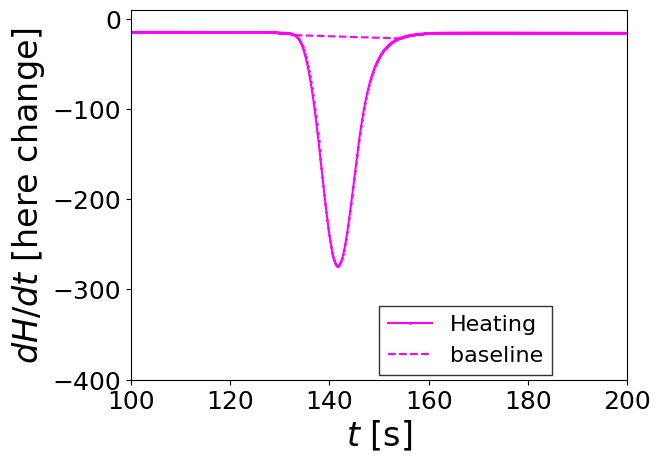

In [ ]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_in_edit["time(s)"], df_in_edit["dH/dt"], marker='o', ms =1, linestyle='-', color='magenta', label="Heating")

plt.plot(df_in_subset["time(s)"], df_in_subset["dH/dt_linfit"], linestyle='--', color='magenta', label="baseline")

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dH/dt$ [here change]", fontsize=24)

plt.xlim([100, 200])
plt.ylim([-400, 10])

#bbox_to_anchor = () ここで，x,yの場所を指定
plt.legend(bbox_to_anchor=(0.5, 0.2), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)

plt.tick_params(labelsize=18)

# *これをcoolingやdS/dtにもやる．baselineの引き方は頑張る．*
# 加えて，積分は，df_in_subset["dH/dt_linfit"]-df_in_subset["dH/dt"]で積分の微小区間の短冊を計算できるので，あとは微小区間の時間df_in_subset["time(s)"]を使えば，転移エンタルピーなどは計算できますよね？？？？

# Niについてもいくつかの例を示す

In [ ]:
df_ni = pd.read_excel("/content/drive/MyDrive/3AP_06/excel_Ni_5Kpm_7.7mg_20250530.xlsx", skiprows=21, usecols="A:D")

In [ ]:
df_ni_edit  = df_ni

df_ni_edit

,min,Cel,uW,uW/min
0,0.000000,315.394379,49.707275,-314.645508
1,0.003333,315.392303,50.675293,-301.458984
2,0.006667,315.390198,51.632568,-286.331543
3,0.010000,315.388092,52.592896,-269.317383
4,0.013333,315.385925,53.552246,-249.382324
...,...,...,...,...
8996,29.986667,313.295563,286.343323,-6.019043
8997,29.990000,313.295471,286.364990,-5.942139
8998,29.993333,313.295349,286.386536,-5.833740
8999,29.996667,313.295288,286.406250,-5.730469


In [ ]:
# "#"はコメントアウトを意味する
###  質量とmolを計算
mass = 0.0077 #1.1 mg
g_mol = 58.6934 #
mol = mass/g_mol

###  時間を温度を秒とKに変換
df_ni_edit ["time(s)"] = df_ni_edit.iloc[:, 0] * 60
df_ni_edit ["temp(K)"] = df_ni_edit.iloc[:, 1] + 273.15

#df_ni_edit["dT/dt"] = (df_ni_edit["temp(K)"].shift(1) - df_ni_edit["temp(K)"])/(df_ni_edit["min"].shift(-1) - df_ni_edit["min"])
df_ni_edit["dT/dt"] = -(df_ni_edit["temp(K)"].shift(-1) - df_ni_edit["temp(K)"])/(df_ni_edit["time(s)"].shift(-1) - df_ni_edit["time(s)"])
#df_ni_edit["dT/dt"] = -(df_ni_edit.iloc[:, 1].shift(-1) - df_ni_edit.iloc[:, 1])/(df_ni_edit["min"].shift(-1) - df_ni_edit["min"])
#df_ni_edit["dT/dt"].fillna(0, inplace=True)

# C列*1.0*10^-6/G/(mass)
df_ni_edit["c"] = df_ni_edit["uW"]*10.0**(-6)/(df_ni_edit["dT/dt"])
#df_ni_edit["c"] = df_ni_edit.iloc[:, 2]*10.0**(-6)/(df_ni_edit["dT/dt"])
df_ni_edit["c"] /= mass

#
df_ni_edit["dH/dt"] =df_ni_edit.iloc[:, 2]*0.000001/mol

#
df_ni_edit["dS/dt"] =df_ni_edit.iloc[:, 2]*0.000001/mol/df_ni_edit.iloc[:, 5]


df_ni_edit.head(100)

,min,Cel,uW,uW/min,time(s),temp(K),dT/dt,c,dH/dt,dS/dt
0,0.000000,315.394379,49.707275,-314.645508,0.0,588.544379,0.010376,0.622157,0.378895,0.000644
1,0.003333,315.392303,50.675293,-301.458984,0.2,588.542303,0.010529,0.625081,0.386273,0.000656
2,0.006667,315.390198,51.632568,-286.331543,0.4,588.540198,0.010529,0.636889,0.393570,0.000669
3,0.010000,315.388092,52.592896,-269.317383,0.6,588.538092,0.010834,0.630461,0.400890,0.000681
4,0.013333,315.385925,53.552246,-249.382324,0.8,588.535925,0.010681,0.651132,0.408203,0.000694
...,...,...,...,...,...,...,...,...,...,...
95,0.316667,315.937286,-464.970947,1647.729492,19.0,589.087286,-0.083313,0.724807,-3.544250,-0.006017
96,0.320000,315.953949,-470.341553,1607.208984,19.2,589.103949,-0.084076,0.726526,-3.585188,-0.006086
97,0.323333,315.970764,-475.563721,1566.142090,19.4,589.120764,-0.084686,0.729298,-3.624994,-0.006153
98,0.326667,315.987701,-480.654297,1524.786621,19.6,589.137701,-0.085297,0.731830,-3.663797,-0.006219


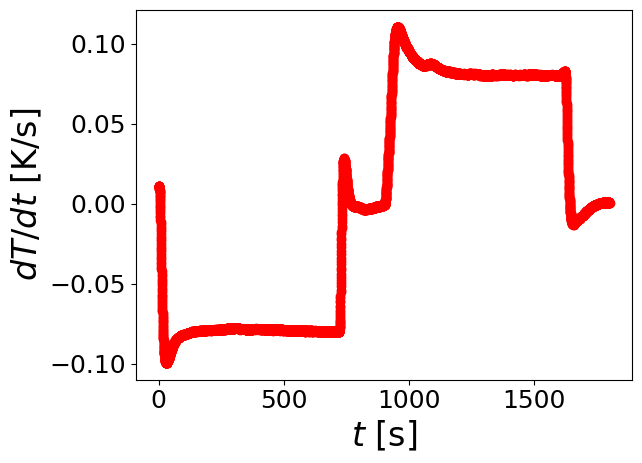

In [ ]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_ni_edit["time(s)"], df_ni_edit["dT/dt"], marker='o', linestyle='-', color='red')

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dT/dt$ [K/s]", fontsize=24)

plt.tick_params(labelsize=18)



Text(0, 0.5, 'C')

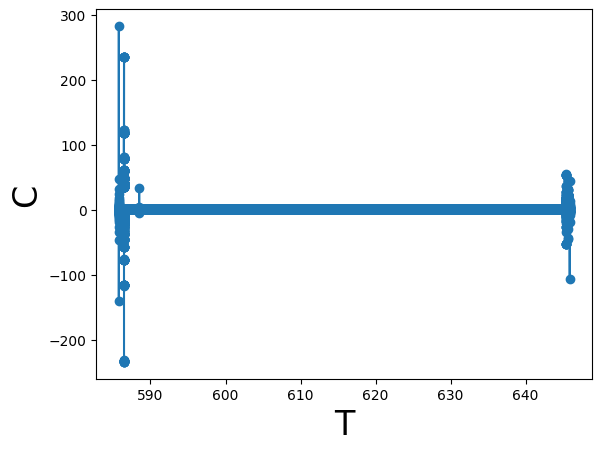

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_ni_edit["temp(K)"], df_ni_edit["c"], marker='o', linestyle='-')

# ラベル・タイトル
plt.xlabel("T", fontsize=24)
plt.ylabel("C", fontsize=24)

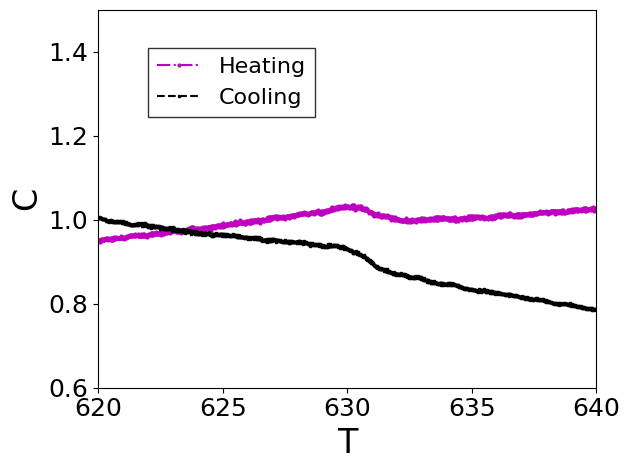

In [ ]:
import matplotlib.pyplot as plt

from google.colab import files

# データの長さを取得して半分に分割
mid_index = len(df_ni_edit) // 2
df_first = df_ni_edit.iloc[:mid_index]
df_second = df_ni_edit.iloc[mid_index:]

# プロット
plt.plot(df_first["temp(K)"], df_first["c"], marker='o', ms=2, linestyle='-.', label='Heating', color='m')
plt.plot(df_second["temp(K)"], df_second["c"], marker='s', ms=2, linestyle='--', label='Cooling', color='black')

# ラベル・軸範囲など
plt.xlabel("T", fontsize=24)
plt.ylabel("C", fontsize=24)
plt.xlim([620, 640])
plt.ylim([0.6, 1.5])
plt.legend()
#plt.title("Temperature vs Time")
plt.legend(bbox_to_anchor=(0.1, 0.9), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)
plt.tick_params(labelsize=18)

# レイアウト調整
plt.tight_layout()



plt.show()

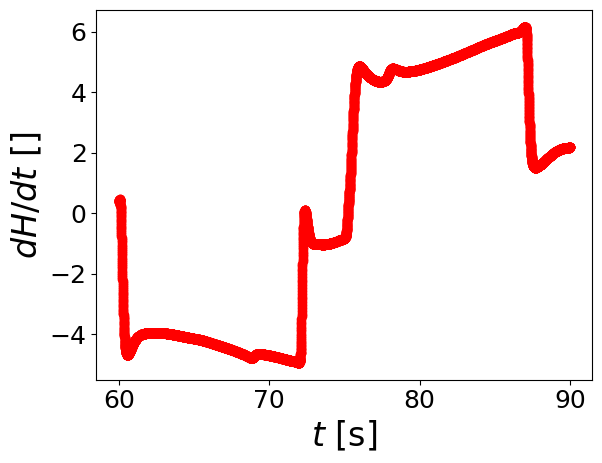

In [ ]:
### plotと画像ファイルの保存の例
import matplotlib.pyplot as plt

plt.plot(df_ni_edit["time(s)"], df_ni_edit["dH/dt"], marker='o', linestyle='-', color='red')

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=24)
plt.ylabel("$dH/dt$ []", fontsize=24)

plt.tick_params(labelsize=18)
